In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv(r"C:\Users\Divya\Downloads\NewspaperData.csv")

In [3]:
data

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [4]:
print(data.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes
None


In [5]:
print(data.describe()) 

             daily       sunday
count    34.000000    34.000000
mean    430.962471   591.202412
std     269.211470   376.418051
min     133.239000   202.614000
25%     233.021500   327.769500
50%     355.235500   436.712500
75%     516.616500   699.735250
max    1209.225000  1762.015000


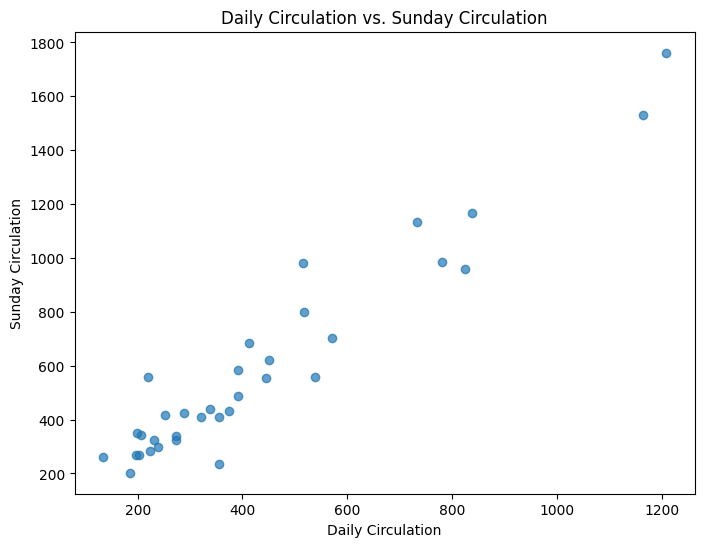

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(data['daily'], data['sunday'], alpha=0.7)
plt.title('Daily Circulation vs. Sunday Circulation')
plt.xlabel('Daily Circulation')
plt.ylabel('Sunday Circulation')
plt.show()


In [7]:
correlation = data[['daily', 'sunday']].corr()
print("Correlation Matrix:\n", correlation)

Correlation Matrix:
            daily    sunday
daily   1.000000  0.958154
sunday  0.958154  1.000000


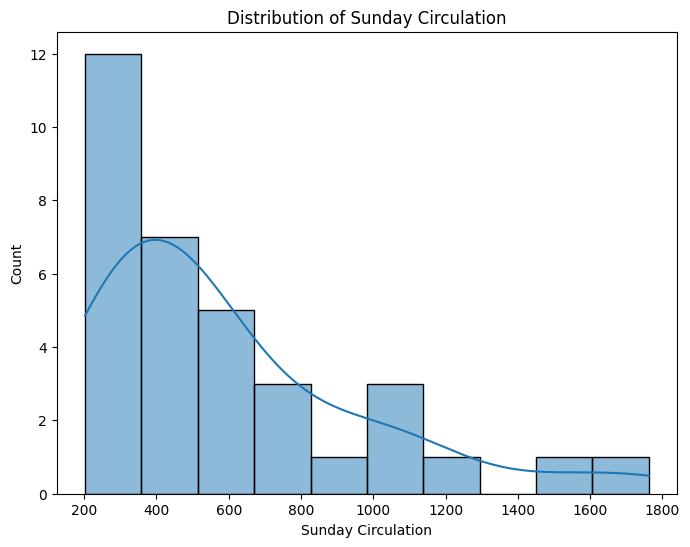

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(data['sunday'], kde=True, bins=10)
plt.title('Distribution of Sunday Circulation')
plt.xlabel('Sunday Circulation')
plt.show()

In [9]:
data = data.drop(columns=['Newspaper'])


In [10]:
X = data[['daily']]
y = data['sunday']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)
y_pred

array([ 569.59026048, 1138.99855803,  515.96411751,  183.72268779,
        284.40797217,  465.82225253,  489.51672273])

In [15]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [16]:
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')

Root Mean Squared Error (RMSE): 99.638155016322
R-squared: 0.7977778942032527


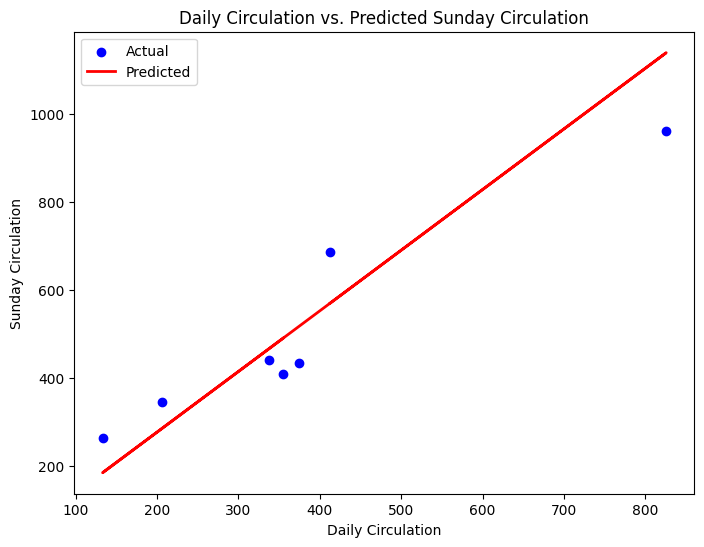

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Daily Circulation vs. Predicted Sunday Circulation')
plt.xlabel('Daily Circulation')
plt.ylabel('Sunday Circulation')
plt.legend()
plt.show()